# Task C

## Goal

1. iterative Method
    1. Calc smallest and biggest eigenvalue 
    2. Calc (all?) eigenvectors?
2. verfiy using some linalg libaray

## sonstiges Wissen

[doppelt stoachastisch](https://de.wikipedia.org/wiki/Doppelt-stochastische_Matrix), daraus folgt:
+ betragsgrößter eigenwert = 1

I use power iteration as described in the lecture of 15.03.2024 and in the code on the [github](https://github.com/nordam/ComputationalPhysics/blob/master/Notebooks/11%20-%20Eigenvalues%2C%20eigenvectors%20and%20SVD.ipynb). I used the code example provided there.


In [42]:
from tools import power_iteration, generate_matrix_simple
import numpy as np
import matplotlib.pyplot as plt

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [43]:
# Parameter
nodes = 21
starting_x = 10
connections = [-2,-1,1,2]
maxiter = 1000
tol = 1e-10

In [44]:
# generate inital_state and matrix
t_matrix = generate_matrix_simple(nodes,connections)

In [45]:
# find biggest eigenvalue
eig_val_big, eig_vec_big, conv_status = power_iteration(t_matrix, maxiter, tol)
print(f"eigenvalue: {eig_val_big}")
print(f"eigenvector: {eig_vec_big}")
print(f"converged: {conv_status}")

eigenvalue: 1.0
eigenvector: [0.21821789 0.21821789 0.21821789 0.21821789 0.21821789 0.21821789
 0.21821789 0.21821789 0.21821789 0.21821789 0.21821789 0.21821789
 0.21821789 0.21821789 0.21821789 0.21821789 0.21821789 0.21821789
 0.21821789 0.21821789 0.21821789]
converged: False


In [46]:
# Now we find the (absolute) smallest eigenvalue
# First step inverting the Matrix 
inv_t_matrix = np.linalg.inv(t_matrix)
inv_eig_val, inv_eig_vec, conv_status = power_iteration(inv_t_matrix, maxiter, tol)
# calculate the smalles eig_value
eig_val_small = 1/inv_eig_val
eig_vec_small = inv_eig_vec
print(f"eigenvalue: {eig_val_small}")
print(f"eigenvector: {eig_vec_small}")
print(f"converged: {conv_status}")


eigenvalue: 0.0166290102194939
eigenvector: [ 0.30694628 -0.29875306  0.2838862  -0.26267779  0.23560159 -0.20326244
  0.16638274 -0.12578633  0.08238006 -0.03713355 -0.00894246  0.0548187
 -0.09947039  0.14190008 -0.18115995  0.216373   -0.24675265  0.27162024
 -0.29042029  0.30273283 -0.30828282]
converged: True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-0.5617449  -0.5617449  -0.5        -0.5        -0.45705037 -0.45705037
 -0.32916089 -0.32916089 -0.18385542 -0.18385542 -0.13873953 -0.13873953
 -0.01662901 -0.01662901  0.20048443  0.20048443  0.5957899   0.5957899
  0.89090579  0.89090579  1.        ]


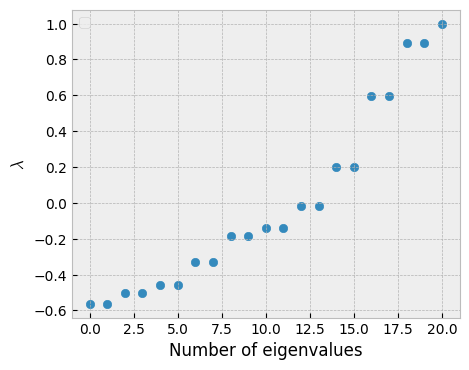

'\nPattern: every eignvalues except for one appears twice (degeneracy)\n'

In [47]:
# Now we control the eigenvalues using a linalg solver
eig_val_check, eig_vec_check = np.linalg.eigh(t_matrix)

print(eig_val_check)
def index_gen(li):
    return list(range(len(eig_val_check)))

plt.figure(figsize=(5,4))

plt.xlabel("Number of eigenvalues")
plt.ylabel("$\lambda$")
plt.legend()
plt.scatter(index_gen(eig_val_check),eig_val_check)
plt.savefig("images/eigenvalues.pdf")
plt.show()

"""
Pattern: every eignvalues except for one appears twice (degeneracy)
"""


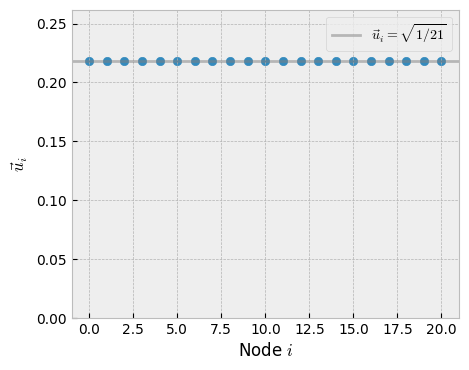

In [63]:

x = list(range(nodes))
plt.figure(figsize=(5,4))
plt.scatter(x,eig_vec_big)

plt.xlabel("Node $i$")
plt.ylabel("$\\vec{u}_i$")
plt.ylim(0, 1.2*np.sqrt(1/21))
plt.axhline(np.sqrt(1/21),label="$ \\vec{u}_i = \\sqrt{1/21}$",color="grey",alpha=0.5)
plt.legend()

plt.savefig(f"images/eigenvector_1.pdf")